Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "ADEWALE ADEBOGUN ODUNSI"
COLLABORATORS = "2110481"

---

---
# Welcome to CE880
### This is your week-9 : Problem notebook

For this problem set, we'll be using the Jupyter notebook and please upload this notebook to [Google Colab](https://colab.research.google.com/). 

Paris Housing is a set of data created from imaginary data of house prices in an urban environment. 
https://github.com/sagihaider/CE880_2021/blob/main/Data/ParisHousingClass.csv 

All attributes are numeric variables and they are listed bellow:
* squareMeters
* numberOfRooms
* hasYard
* hasPool
* floors - number of floors
* cityCode - zip code
* cityPartRange - the higher the range, the more exclusive the neighbourhood is
* numPrevOwners - number of prevoious owners
* made - year
* isNewBuilt
* hasStormProtector
* basement - basement square meters
* attic - attic square meteres
* garage - garage size
* hasStorageRoom
* hasGuestRoom - number of guest rooms
* price - price of a house
* category - Luxury or Basic

In [2]:
import numpy as np 
import pandas as pd 
url = 'https://raw.githubusercontent.com/sagihaider/CE880_2021/main/Data/ParisHousingClass.csv'
trainData = pd.read_csv(url,index_col=0)
# print(trainData.head())

In [3]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le=LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)
trainData['category']=label_encoded(trainData['category'])

category ['Basic' 'Luxury']


In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV

y=trainData['category']
x=trainData.drop('category',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

---
## Question 1: 

#### Classification
Use the `Paris Housing` dataset, which we have laoded and spilted into `training` and `test` sets (`xtrain`, `xtest`, `ytrain`, `ytest`). Your job is to train the machine learning classificaiton model to get the test accuracy of 100%. You are free to use any classication model such as Decision Tree, Random Forest, KNN, SVM. I would recommend using Grid Search Algorithm to find a best set of hyper-parameters and add that training algorithm to the `my_model` function below. 
You are also free to use any data vislusation methods to understand the varaibles. Trying implementing feature importance and pass as minimum variables as possible to train your classifier. This is not mandaroty and totally upto you. 



In [5]:
trainData.head().T

squareMeters,75523,80771,55712,32316,70429
numberOfRooms,3.0,39.0,58.0,47.0,19.0
hasYard,0.0,1.0,0.0,0.0,1.0
hasPool,1.0,1.0,1.0,0.0,1.0
floors,63.0,98.0,19.0,6.0,90.0
cityCode,9373.0,39381.0,34457.0,27939.0,38045.0
cityPartRange,3.0,8.0,6.0,10.0,3.0
numPrevOwners,8.0,6.0,8.0,4.0,7.0
made,2005.0,2015.0,2021.0,2012.0,1990.0
isNewBuilt,0.0,1.0,0.0,0.0,1.0
hasStormProtector,1.0,0.0,0.0,1.0,0.0


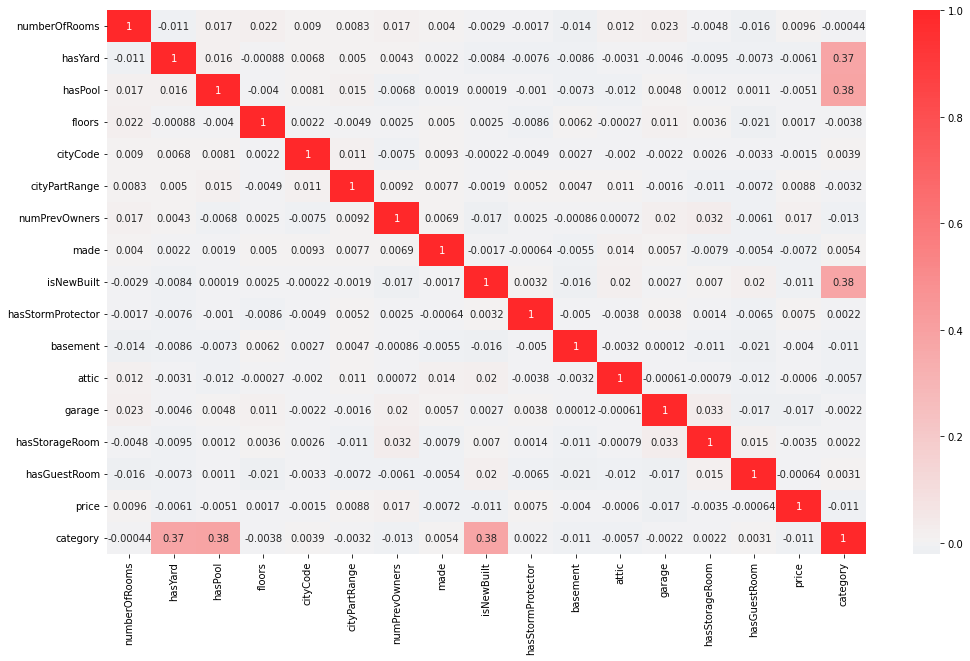

In [6]:
import seaborn as sbn
import matplotlib.pyplot as mpt
#Generate a matrix of Correlation Coefficients. 
#This number is a relationship indicator between our data particularly between paramers and the ground truth (label)
sbn.reset_orig()
corr_mX = trainData.corr()
corr_layout = sbn.diverging_palette(245, 12, s=100, l=55, n=10, as_cmap=True)
mpt.figure(figsize=(17,10))
sbn.heatmap(corr_mX, annot=True, cmap=corr_layout, center=0)

In [7]:
#We extract the ground truth column of interest from the correlation matrix
#and sort the correlation coefficients so as to trim out least significant parameters 
category_correlations = corr_mX.iloc[-1:].T
category_correlations.sort_values(by=['category'])

,category
numPrevOwners,-0.012843
price,-0.011399
basement,-0.011310
attic,-0.005729
floors,-0.003827
cityPartRange,-0.003171
garage,-0.002218
numberOfRooms,-0.000442
hasStormProtector,0.002182
hasStorageRoom,0.002229


In [8]:
#From the correlation coefficients above, It is reasonable to say that correlation coefficients 
#between -0.0075 and +0.0075 (using 4 decimal places) indicates extremely weak or no linear correlation 
#with the ground truth CATEGORY and as such can be prune out.

#At this juncture, "insignificant parameters" is hereby prune.
trainData = trainData.drop(['attic', 'floors', 'cityPartRange', 'garage', 'numberOfRooms', 'hasStormProtector',
                            'hasStorageRoom', 'hasGuestRoom', 'cityCode', 'made'], axis=1)
trainData.head(6).T

squareMeters,75523,80771,55712,32316,70429,39223
hasYard,0.0,1.0,0.0,0.0,1.0,0.0
hasPool,1.0,1.0,1.0,0.0,1.0,1.0
numPrevOwners,8.0,6.0,8.0,4.0,7.0,6.0
isNewBuilt,0.0,1.0,0.0,0.0,1.0,0.0
basement,4313.0,3653.0,2937.0,659.0,8435.0,2009.0
price,7559081.5,8085989.5,5574642.1,3232561.2,7055052.0,3926647.2
category,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
#I developed 5 different models to see how they perform on our data. The algorithms are :-
#Random Decision Forest (100%)
#Decision Tree (100%)
#Support Vector Classifier (87.38%)
#Logistic regression (87.38%)
#K Nearest Neighbour (87.38%)
#Since Random Decision Forest and Decision tree gave 100% I shall use both but return one of the results

In [11]:
import sklearn as skl
import warnings

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
def my_model(xtrain,xtest,ytrain,ytest):
    """Write a function to train a machine learning model to get the test accuracy of 100%. 
    You are free to use any classication model such as Decision Tree, 
    Random Forest, KNN, SVM..etc. """      
    
    ran_fore_pipe =skl.pipeline.Pipeline([('ran_fore', skl.ensemble.RandomForestClassifier())])   
    dec_tree_pipe =skl.pipeline.Pipeline([('dec_tree', skl.tree.DecisionTreeClassifier(random_state=42))])
   
    #The  models are placed in a pipeline and fitted
    p_lines = [ran_fore_pipe, dec_tree_pipe]

    for p in p_lines:
        p.fit(xtrain, ytrain)

    # Reference for printout
    p_dict = {0: "Random Decision Forest", 1: "Decision Tree"} 
    
    #Accuracy cross validation 
    crossV_accuracy = []
    for k, predictor in enumerate(p_lines):
        crossV_fig = skl.model_selection.cross_val_score(predictor, xtrain, ytrain, cv=20 )
        crossV_accuracy.append(crossV_fig)
        print("%s: %f " % (p_dict[k], crossV_fig.mean()))      
    # YOUR CODE HERE
    return crossV_fig.mean() *100
    raise NotImplementedError()


In [12]:
# Check you solution by running this cell
import math
assert math.isclose(my_model(xtrain,xtest,ytrain,ytest), 100.0, rel_tol = 0.05)

Random Decision Forest: 1.000000 
Decision Tree: 1.000000 
